# Assignment 2 / Inferential Statistics / NYC Rolling Sales 

Nama : Wilda Amrul Munafiah

Program : Python for Data Science

Kode Peserta : PYTN-KS16-021


# Dataset
Data NYC Rolling sales didapat dari kaggle melalui link berikut 

https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

## Key Elements 
#### Measures Of Central Tendency
- Mean
- Median
- Mode
#### Measures Of Spread
- Range
- Variance
- Standard Deviation
#### Probability Distribution
#### Confidence Intervals
#### Hypothesis Testing
#### Prepocessing


## Questions
1. Is there a difference in unit sold between property built in 1900-2000 and 2001 so on
2. Is there a difference in unit sold based on building category
3. what can you discover about New York City real estate by looking at a years worth of raw transaction records ? can you spot trends in the market?

### Import Library

In [1]:
import math
import statistics
from scipy import stats

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# NYC Property Sales
nyc=pd.read_csv('nyc-rolling-sales.csv')
nyc.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
#Sample data
#melihat 5 baris pertama dari DataFrame
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# lets to view about dataframe
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
nyc.shape

(84548, 22)

## Data Cleaning
Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data.


In [7]:
nyc.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
nyc.isna()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
nyc.duplicated().sum()

0

## Data Preprocessing

In [10]:
#Menghapus kolom yang tidak digunakan
nyc=nyc.drop(["Unnamed: 0",
              "NEIGHBORHOOD", 
              "BUILDING CLASS CATEGORY",
              "TAX CLASS AT PRESENT",
              "EASE-MENT",
              "BUILDING CLASS AT PRESENT",
              "ADDRESS", 
              "APARTMENT NUMBER", 
              "ZIP CODE"], axis=1)

nyc

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,392,6,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,399,26,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,399,39,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,402,21,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,404,55,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,7349,34,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,7349,78,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,7351,60,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,7100,28,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   BLOCK                           84548 non-null  int64 
 2   LOT                             84548 non-null  int64 
 3   RESIDENTIAL UNITS               84548 non-null  int64 
 4   COMMERCIAL UNITS                84548 non-null  int64 
 5   TOTAL UNITS                     84548 non-null  int64 
 6   LAND SQUARE FEET                84548 non-null  object
 7   GROSS SQUARE FEET               84548 non-null  object
 8   YEAR BUILT                      84548 non-null  int64 
 9   TAX CLASS AT TIME OF SALE       84548 non-null  int64 
 10  BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 11  SALE PRICE                      84548 non-null  object
 12  SALE DATE                       84548 non-null

In [12]:
#Convert data pada kolom
#Convert object -> int64
convertInt=["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]
for i in convertInt:
    nyc[i] = pd.to_numeric(nyc[i], errors="coerce").fillna(0).astype("int64")

#Convert object -> datetime
convertDate=["SALE DATE"]
for i in convertDate:
    nyc[i] = pd.to_datetime(nyc[i], errors="coerce")

nyc.dtypes

BOROUGH                                    int64
BLOCK                                      int64
LOT                                        int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE                         datetime64[ns]
dtype: object

In [13]:
#Melakukan perubahan pada kolom borough
nyc['BOROUGH']= nyc.BOROUGH.replace({1:'Manhattan',2:'Brooklyn',3: "Bronx", 4: "Queens", 5: "Staten Island"})
nyc

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,392,6,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,Manhattan,399,26,28,3,31,4616,18690,1900,2,C7,0,2016-12-14
2,Manhattan,399,39,16,1,17,2212,7803,1900,2,C7,0,2016-12-09
3,Manhattan,402,21,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,Manhattan,404,55,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,7349,34,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,Staten Island,7349,78,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21
84545,Staten Island,7351,60,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05
84546,Staten Island,7100,28,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21


In [14]:
#Mengganti nilai pada kolom year built dengan nilai median sebagai langkah menghilangkan outlier
mean_yearbuilt = nyc["YEAR BUILT"].median()
mean_yearbuilt

1940.0

In [15]:
nyc['YEAR BUILT']=nyc['YEAR BUILT'].mask(nyc['YEAR BUILT']==0,1940)
nyc

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,392,6,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,Manhattan,399,26,28,3,31,4616,18690,1900,2,C7,0,2016-12-14
2,Manhattan,399,39,16,1,17,2212,7803,1900,2,C7,0,2016-12-09
3,Manhattan,402,21,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,Manhattan,404,55,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,7349,34,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,Staten Island,7349,78,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21
84545,Staten Island,7351,60,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05
84546,Staten Island,7100,28,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21


In [16]:
#Mengganti nilai pada kolom sale price dengan nilai median sebagai langkah menghilangkan outlier
mean_saleprice = nyc["SALE PRICE"].median()
mean_saleprice

415000.0

In [17]:
nyc["SALE PRICE"]=nyc["SALE PRICE"].mask(nyc["SALE PRICE"] == 0,415000)
nyc

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,392,6,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,Manhattan,399,26,28,3,31,4616,18690,1900,2,C7,415000,2016-12-14
2,Manhattan,399,39,16,1,17,2212,7803,1900,2,C7,415000,2016-12-09
3,Manhattan,402,21,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,Manhattan,404,55,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,7349,34,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,Staten Island,7349,78,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21
84545,Staten Island,7351,60,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05
84546,Staten Island,7100,28,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21


## Exploratory Data Analysis

# Measure of Central Tendency

## Mean 
Mean adalah central tendency dari data, angka dari seluruh data yang tersebar. Mean merupakan angka tunggal yang dapat memperkirakan nilai seluruh kumpulan data. Mean / Rata-rata dihitung dengan jumlah semua nilai dibagi dengan jumlah nilai.

##### Questions:
Berapa nilai mean pada kolom residential units, total units, sale price di setiap wilayah (borough)?

In [18]:
# Menggabungkan kolom Residential Units ke kolom "BOROUGH" dg menggunakan perintah groupby
# Menghitung nilai mean dari kolom Residential Units
mean_Residential=nyc[['BOROUGH', 'RESIDENTIAL UNITS']].groupby('BOROUGH').mean()
mean_Residential

,RESIDENTIAL UNITS
BOROUGH,
Bronx,2.035639
Brooklyn,3.436658
Manhattan,2.307495
Queens,1.701489
Staten Island,1.227586


In [19]:
# Menggabungkan kolom Total Units ke kolom "BOROUGH" dg menggunakan perintah groupby
# Menghitung nilai mean dari kolom Total Units
mean_Total=nyc[['BOROUGH', 'TOTAL UNITS']].groupby('BOROUGH').mean()
mean_Total

,TOTAL UNITS
BOROUGH,
Bronx,2.220651
Brooklyn,3.603774
Manhattan,2.649623
Queens,1.938996
Staten Island,1.309869


In [20]:
# Menggabungkan kolom Land square feet ke kolom "BOROUGH" dg menggunakan perintah groupby
# Menghitung nilai mean dari kolom Sale Price
mean_SPrice=nyc[['BOROUGH', 'SALE PRICE']].groupby('BOROUGH').mean()
mean_SPrice

,SALE PRICE
BOROUGH,
Bronx,9.787124e+05
Brooklyn,7.003461e+05
Manhattan,2.720501e+06
Queens,6.391038e+05
Staten Island,5.068247e+05



## Median
Median / nilai tengah adalah nilai yang membagi data dalam 2 bagian yang sama yaitu jumlah suku di sisi kanannya samadengan jumlah suku di sisi kirinya saat data disusun dalam urutan naik/turun

 ###### Questions :
 Berapa nilai median pada kolom Land square feet, Gross square feet, dan Sale price di setiap wilayah (borough)?

In [21]:
median_LandS = nyc[['BOROUGH','LAND SQUARE FEET']].groupby('BOROUGH').median().sort_values(by='LAND SQUARE FEET', ascending=True)
median_LandS

,LAND SQUARE FEET
BOROUGH,
Manhattan,0.0
Bronx,1800.0
Queens,2117.0
Brooklyn,2375.0
Staten Island,3200.0


In [22]:
median_Gross = nyc[['BOROUGH','GROSS SQUARE FEET']].groupby('BOROUGH').median().sort_values(by='GROSS SQUARE FEET', ascending=True)
median_Gross

,GROSS SQUARE FEET
BOROUGH,
Manhattan,0.0
Queens,1264.0
Staten Island,1400.0
Bronx,1536.0
Brooklyn,1760.0


In [23]:
median_SalePrice = nyc[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_SalePrice

,SALE PRICE
BOROUGH,
Brooklyn,415000.0
Queens,415000.0
Staten Island,415000.0
Bronx,420000.0
Manhattan,835500.0


##  Modus
Modus adalah nilai yang muncul secara maksimum dalam kumpulan data, nilai yang memiliki frekuensi tertinggi
###### Questions:
Berapa nilai modus pada kolom residential units, commercial units, total units, land square feet, gross square feet, dan sale price di setiap wilayah (borough)?

In [24]:
#Menghitung nilai modus pada setiap data di kolom BOROUGH
mod_All = nyc[["BOROUGH","RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]].groupby(["BOROUGH"]).apply(pd.DataFrame.mode).reset_index(drop=True)
mod_All

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,Bronx,1,0,1,0,0,415000
1,Brooklyn,1,0,1,0,0,415000
2,Manhattan,0,0,1,0,0,415000
3,Queens,1,0,1,0,0,415000
4,Staten Island,1,0,1,0,0,415000


In [25]:
# Measure of Central Spread

## Range
###### Question:
Berapa Range dari Total Units di setiap wilayah(borough)

In [26]:
#Menghitung nilai range TOTAL UNITS di setiap BOROUGH
range_Total = nyc.groupby("BOROUGH").apply(lambda x: x["TOTAL UNITS"].max() - x["TOTAL UNITS"].min())
range_Total

BOROUGH
Bronx             889
Brooklyn          955
Manhattan        1653
Queens           2261
Staten Island     143
dtype: int64

## Variance
Varians adalah kuadrat jarak rata-rata antara setiap kuantitas dan mean. Variance adalah kuadrat dari standar deviasi. Varians dihitung dengan mencari selisih antara setiap titik dan mean, menguadratkannya, menjumlahkannya, dan kemudian mengambil rata-rata dari angak-angka tersebut.
###### Question:
Berapa nilai variansi semua data berdasarkan wilayah ?

In [27]:
#Menghitung nilai variance semua data di setiap kolom BOROUGH
var_All = nyc.groupby("BOROUGH").var()
var_All

C:\Users\ACER\AppData\Local\Temp\ipykernel_16472\2581320916.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_All = nyc.groupby("BOROUGH").var()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,7.334254e+06,284230.040195,73.069968,2.696896,75.907229,1.980388e+08,2.348546e+08,1325.919161,0.788360,1.528896e+13
Brooklyn,1.116808e+06,580605.653876,560.408622,0.769235,576.031263,3.420048e+08,8.726635e+08,800.948951,0.700288,7.648954e+12
Manhattan,2.874003e+05,776005.293876,494.548162,42.708328,543.256962,2.937959e+07,1.424616e+09,1217.447342,0.301491,4.594510e+14
Queens,1.875575e+07,242618.233395,329.581619,206.971706,542.436937,1.393261e+09,1.157926e+09,763.999661,0.645719,7.235817e+12
Staten Island,5.352743e+06,185032.066518,5.259888,3.919446,9.045604,6.871645e+09,1.542472e+08,944.898640,0.409847,2.588269e+12


## Standard Deviation
Standard Deviation/Simpangan baku adalah pengukuran jarak rata-rata antara setiap besaran dan mean. Standar deviasi yang rendah menunjukkan bahwa titik data cenderung mendekati rata-rata kumpulan data. Sedangkan standar deviasi yang tinggi menunjukkan bahwa titik data tersebar di nilai yang lebih luas
###### Question:
Berapa nilai Standar Deviasi tiap wilayah (borough)?

In [28]:
#Menghitung nilai standar deviasi semua data di setiap kolom BOROUGH
Std_All = nyc.groupby("BOROUGH").std()
Std_All

C:\Users\ACER\AppData\Local\Temp\ipykernel_16472\15358750.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Std_All = nyc.groupby("BOROUGH").std()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,
Bronx,2708.182861,533.132291,8.548097,1.642223,8.712475,14072.627073,15324.967190,36.413173,0.887896,3.910111e+06
Brooklyn,1056.791427,761.974838,23.672951,0.877060,24.000651,18493.371717,29540.878057,28.301042,0.836832,2.765674e+06
Manhattan,536.097242,880.911627,22.238439,6.535161,23.307873,5420.294473,37744.082975,34.891938,0.549082,2.143481e+07
Queens,4330.790455,492.562923,18.154383,14.386511,23.290276,37326.407470,34028.317694,27.640544,0.803566,2.689947e+06
Staten Island,2313.599684,430.153538,2.293445,1.979759,3.007591,82895.386793,12419.629199,30.739204,0.640193,1.608810e+06


## Probability Distribution
###### Question
Bagaimana gambaran probabilitas tiap data dalam kolom ?

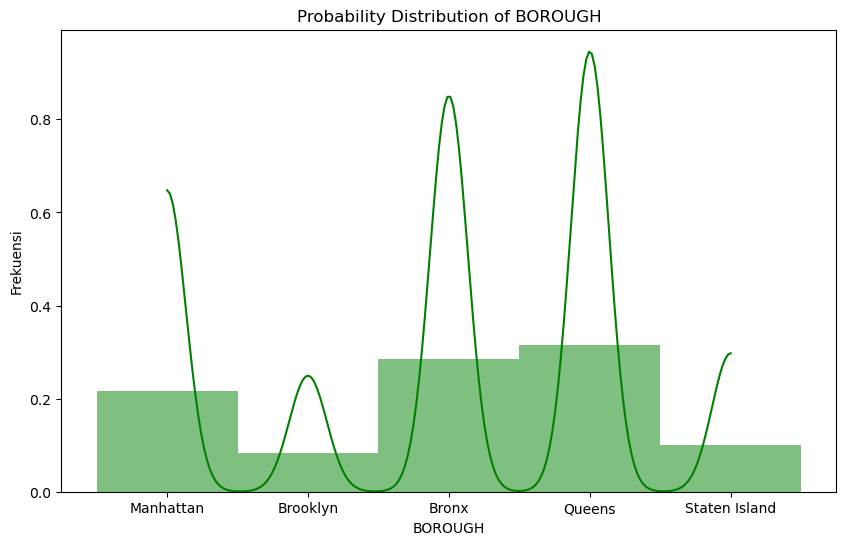

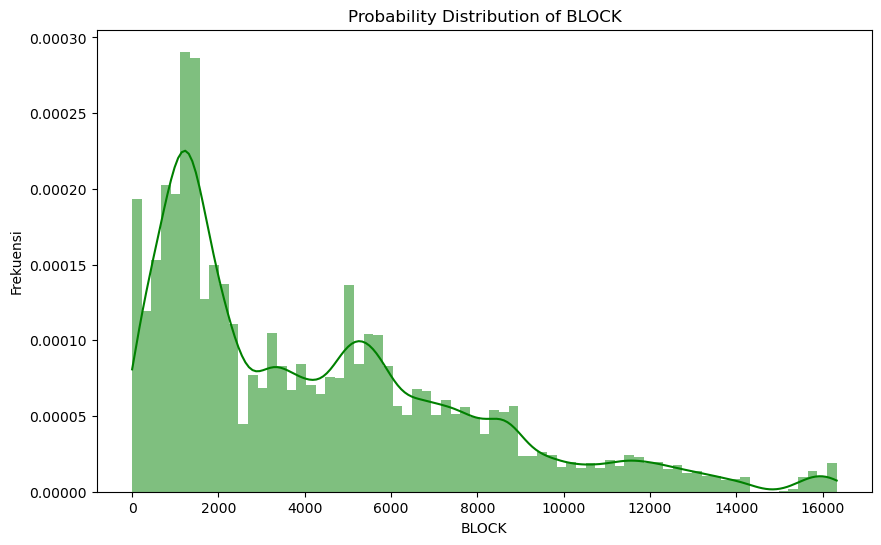

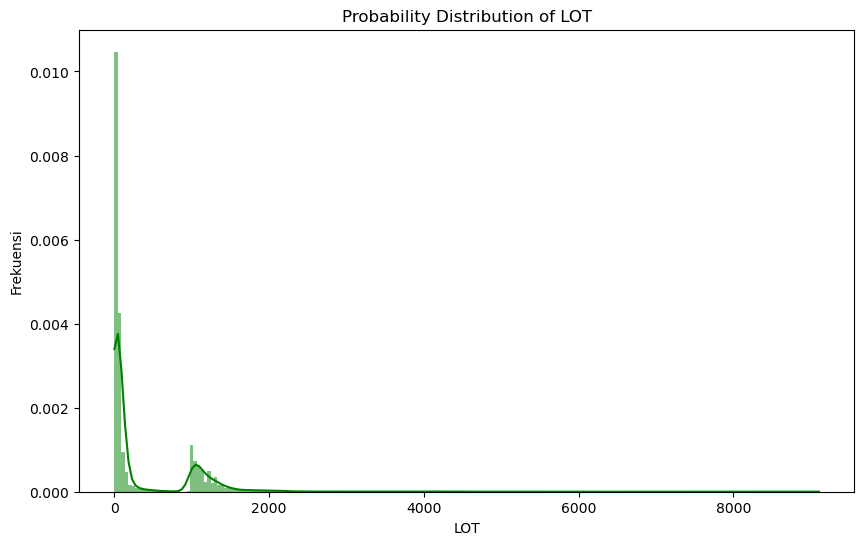

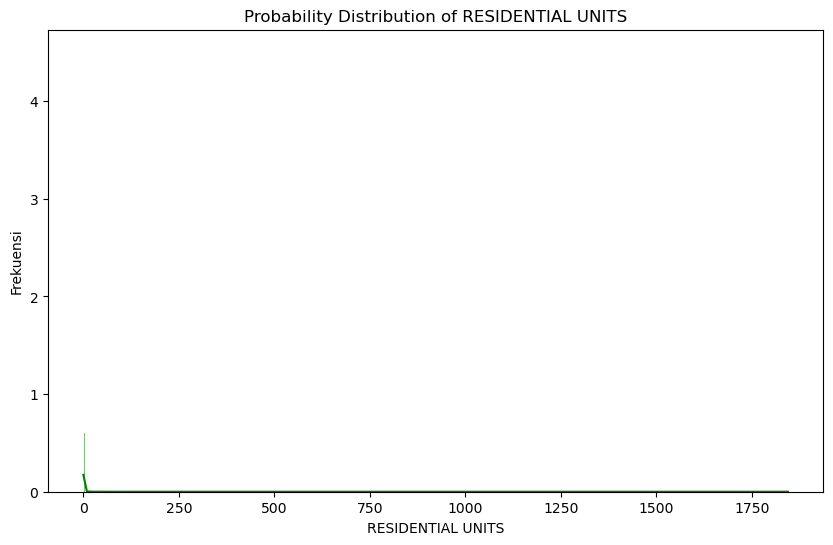

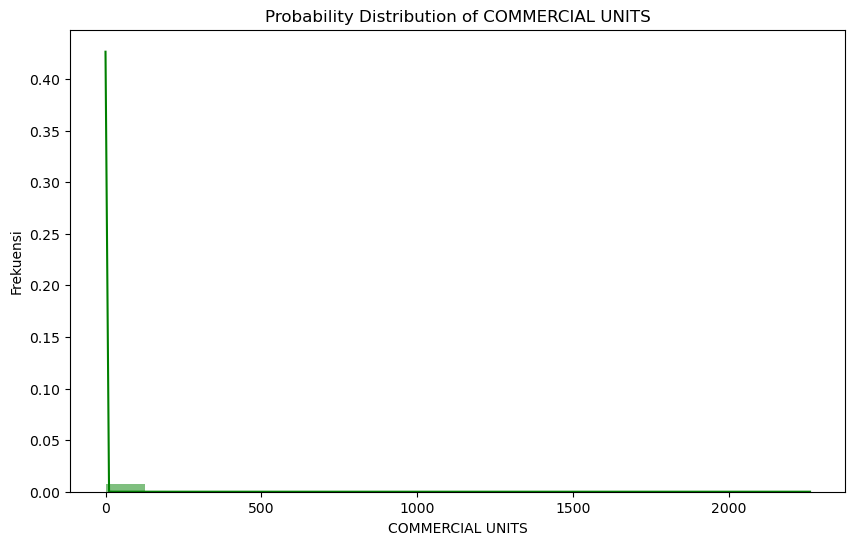

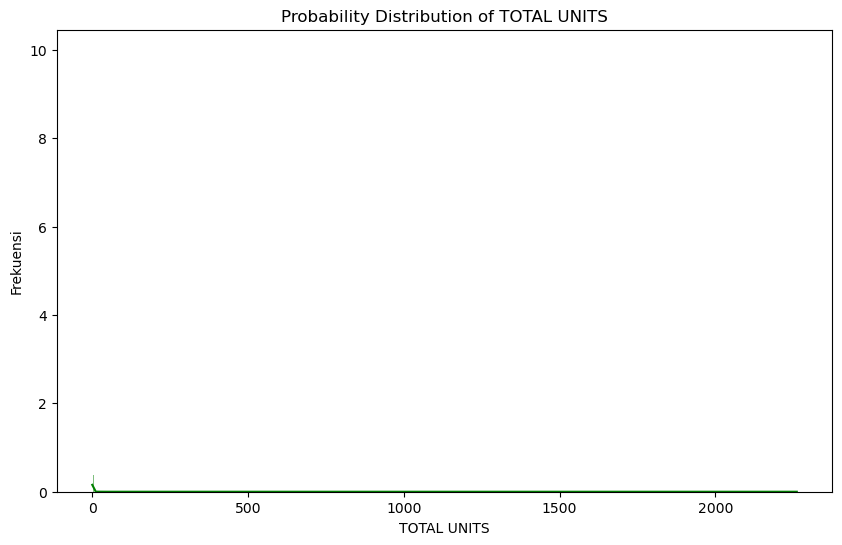

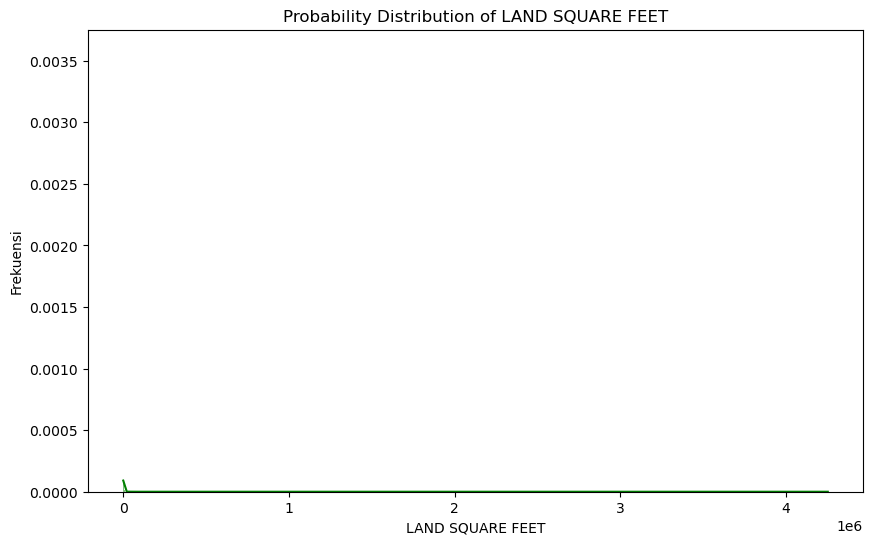

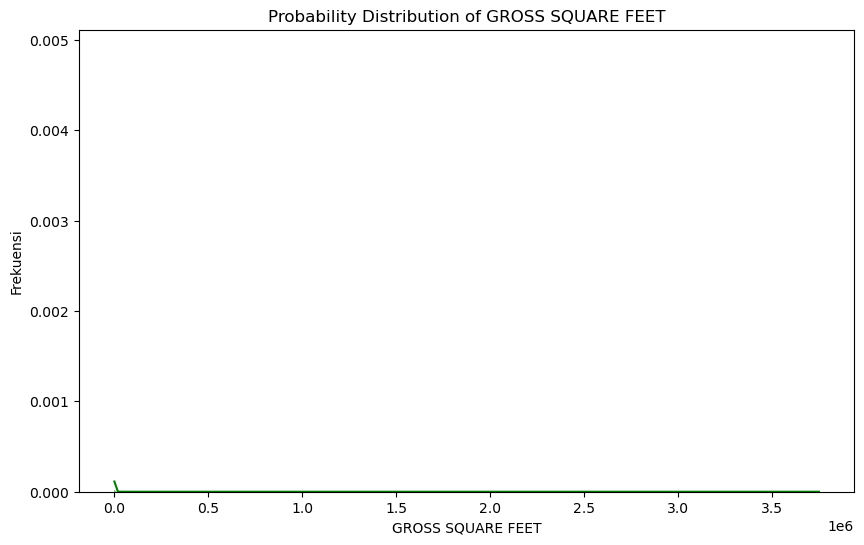

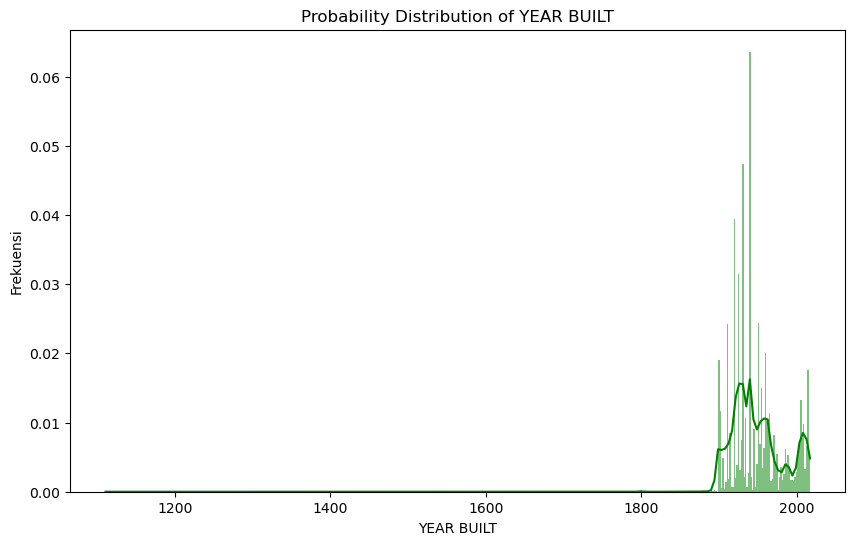

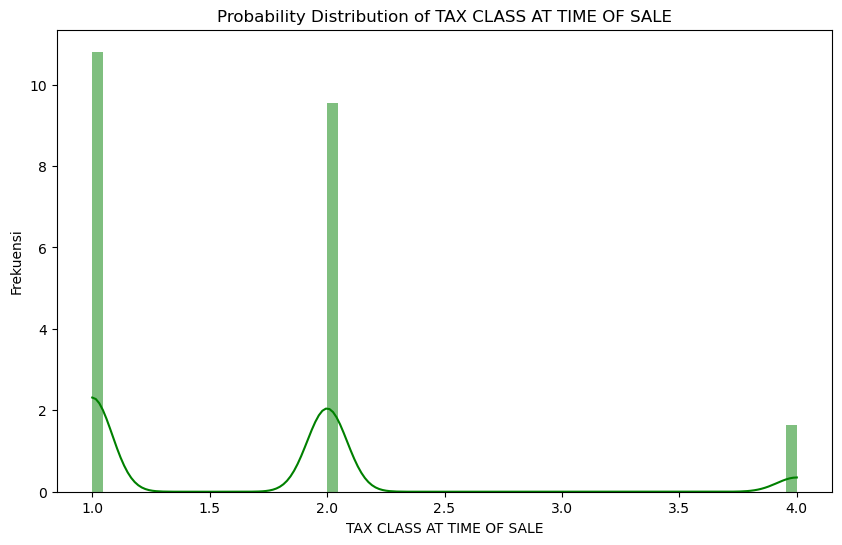

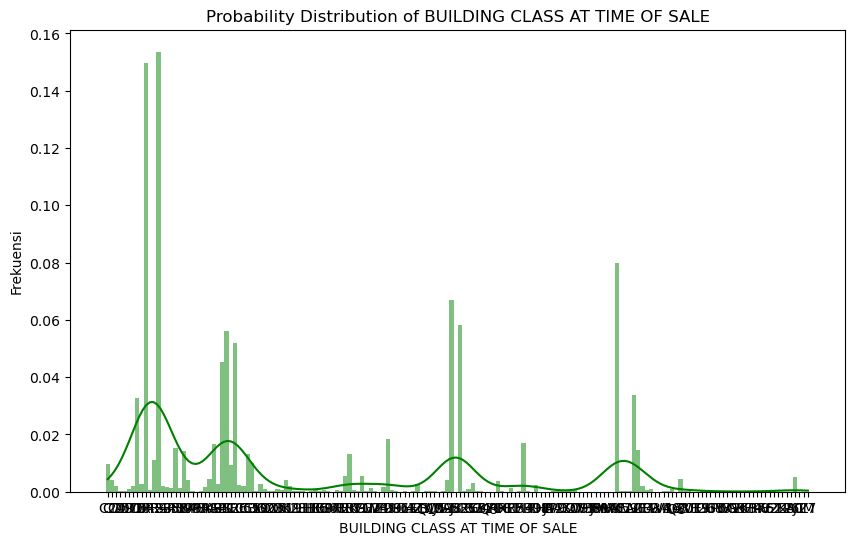

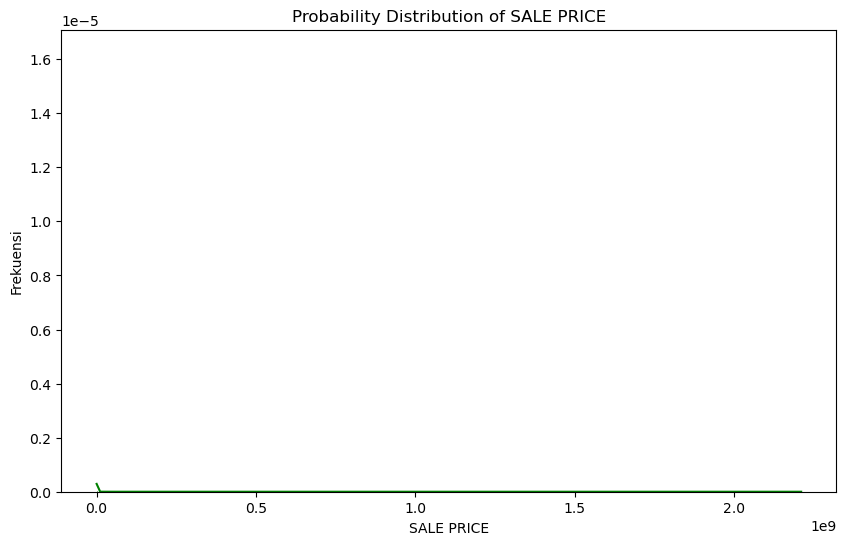

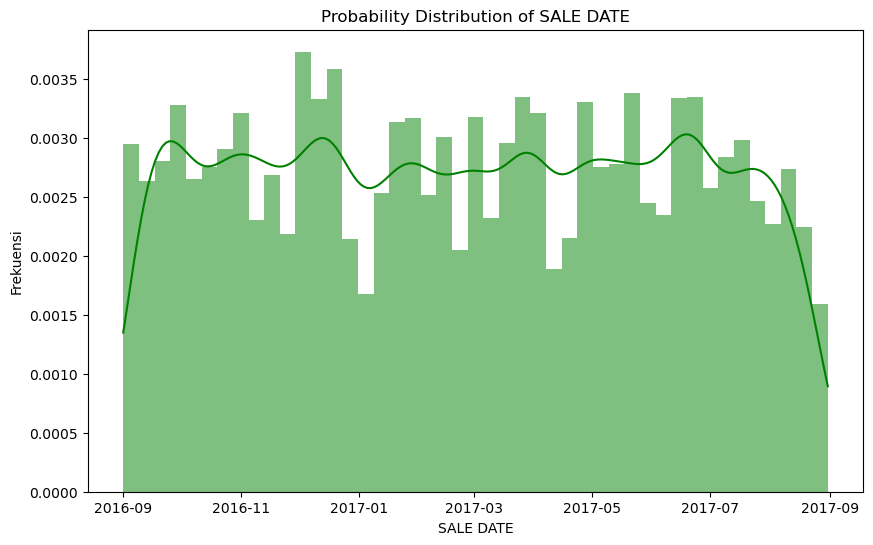

In [29]:
#Membuat grafik probabilitas tiap kolom dengan tipe data numerik
for column in nyc:
    plt.figure(figsize=(10,6))
    sns.histplot(data=nyc, x=column, kde=True, stat="density", color="green", linewidth=0)
    plt.title("Probability Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

## Confidence Intervals
###### Question:
Bagaimana confidence interval pada data sales price wilayah Staten Island

In [33]:
SalesPrices_StatenIsland = pd.crosstab(nyc['SALE PRICE'], nyc['BOROUGH'])
SalesPrices_StatenIsland

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
SALE PRICE,,,,,
1,41,22,32,30,9
2,0,0,2,1,0
3,0,1,0,1,0
5,1,0,0,0,0
8,1,0,0,0,0
...,...,...,...,...,...
565000000,0,0,1,0,0
620000000,0,0,1,0,0
652000000,0,0,1,0,0


In [34]:
#Menemukan nilai mean, standard deviation, dan population size dari data SALE PRICES
dataSale = nyc.groupby("BOROUGH").agg({'SALE PRICE': [np.mean, np.std, np.size]})
dataSale

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          9.787124e+05  3.910111e+06  24047
Brooklyn       7.003461e+05  2.765674e+06   7049
Manhattan      2.720501e+06  2.143481e+07  18306
Queens         6.391038e+05  2.689947e+06  26736
Staten Island  5.068247e+05  1.608810e+06   8410

## Hypothesis Testing
###### question:
Apakah ada perbedaan unit yang terjual antara properti yang dibangun pada tahun 1900-2000 dengan tahun 2001

In [31]:
data_Hypo= nyc.copy()

In [35]:
# Mendapatkan data antara tahun 1900-2000 dan tahun 2001
Sales1900_2000 = data_Hypo[(data_Hypo["YEAR BUILT"] >= 1900) & (data_Hypo["YEAR BUILT"] <= 2000)]
Sales2001 = data_Hypo[data_Hypo["YEAR BUILT"] == 2001]

In [37]:
#Menghitung rata-rata total unit yang terjual
mean1900_2000 = Sales1900_2000['TOTAL UNITS'].mean()
mean2001 = Sales2001['TOTAL UNITS'].mean()

In [38]:
print(f"Nilai mean unit yang terjual tahun 1900 dan 2000: {mean1900_2000:.2f}")
print(f"Nilai mean unit yang terjual tahun 2001: {mean2001:.2f}")

Nilai mean unit yang terjual tahun 1900 dan 2000: 2.26
Nilai mean unit yang terjual tahun 2001: 1.88


### Insight
Dapat dilihat bahwa pada tahun 1900-2000 jumlah unit yang terjual jauh lebih banyak dibanding pada tahun 2001. Atau dapat disimpulkan bahwa penjualan properti terjadi penurunan dari tahun sebelumnya

## Overall Analysis


### 1. Mean (rata-rata)
    - Rata-rata Residential Units terbesar berada pada wilayah Brooxlyn
    - Nilai rata-rata TOTAL UNITS terbesar ialah di wilayah Brooxlyn
    - Nilai rata-rata SALE PRICE terbesar berada di wilayah Bronx
### 2. Median (Nilai Tengah)
    - Nilai median terendah LAND SQUARE FEET & GROSS SQUARE FEET berada di wilayah Manhattan
    - Nilai median SALE PRICE untuk wilayah Brookyn, Queens, dan Staten Island memiliki nilai yang sama yaitu 415000 
### 3. Modus
    - Nilai modus data RESIDENTIAL UNITS pada wilayah Bronx, Brooklyn, Queens, dan Staten Island memiliki nilai yang sama yaitu 1, sedangkan wilayah Manhattan memiliki nilai modul RESIDENTIAL UNITS 0.
    - COMMERCIAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET seluruh wilayah memiliki nilai modus 0.
    - Nilai modus TOTAL UNITS seluruh wilayah adalah 1.
    - Nilai modus SALE PRICE keseluruhan wilayah ialah 415000.
### 4. Range
     Nilai range data TOTAL UNITS terbesar berada pada wilayah Queens dan terkecildi wilayah Staten Island 
### 5.Variance
     Dari seluruh data dalam 10 kolom, kebanyakan nilai variance terbesar dipegang oleh wilayah Manhattan.
### 6. Standard Deviation
     Pengukuran jarak rata-rata atau disebut simpangan baku pada kolom data standar deviasi tersebut dapat dilihat bahwa pada kolom BLOK wilayah Queens memiliki nilai yang paling besar yakni 4330.790455
### 7. Confidence Intervals
     Diperoleh confidence interval pada data TOTAL UNITS setiap wilayahnya dengan nilai lower limit CI 1.661 dan nilai upper limit CI 2.219
### 8. Hypotesis Testing
     Dari pengujian yang telah dilakukan, didapatkan perbedaan nilai dari unit yang terjual pada properti yang dibangun diantara tahun 1900 hingga 2000, dengan properti yang dibangun tahun 2001. Nilai tengah unit yang terjual antara tahun 1900-2000 adalah sebanyak 2,26 dan nilai tengah properti terjual tahun 2001 ialah 1,88 unit.
     Didapatkan hasil bahwa unit properti pada tahun 1900-2000 lebih banyak terjual.